In [67]:
ls data/

Bishayee Colony Counts 10.27.97-3.8.01.xlsx
Bishayee Coulter Counts.10.20.97-7.16.01.xlsx
Other Investigators in Lab.Colony Counts.4.23.92-11.27.02.xlsx
Other Investigators in Lab.Coulter Counts.4.15.92-5.21.05.xlsx
Outside Lab 1.Coulter Counts.6.7.91-4.9.99.xlsx
Outside Lab 2.Coulter Counts.6.6.08-7.7.08.xlsx
Outside Lab 3.Colony Counts.2.4.10-5.21.12.xlsx


In [68]:
import pandas as pd

In [69]:
rst_colony = pd.read_excel('data/Bishayee Colony Counts 10.27.97-3.8.01.xlsx', header=1)
rst_coulter = pd.read_excel('data/Bishayee Coulter Counts.10.20.97-7.16.01.xlsx', header=1)
other_colony = pd.read_excel('data/Other Investigators in Lab.Colony Counts.4.23.92-11.27.02.xlsx', header=1)
other_coulter = pd.read_excel('data/Other Investigators in Lab.Coulter Counts.4.15.92-5.21.05.xlsx', header=1)
outside_1_coulter = pd.read_excel('data/Outside Lab 1.Coulter Counts.6.7.91-4.9.99.xlsx', header=1)
outside_2_coulter = pd.read_excel('data/Outside Lab 2.Coulter Counts.6.6.08-7.7.08.xlsx', header=1)
outside_3_colony = pd.read_excel('data/Outside Lab 3.Colony Counts.2.4.10-5.21.12.xlsx', header=1)

In [70]:
all_data = [rst_colony, rst_coulter, other_colony, other_coulter, outside_1_coulter, outside_2_coulter, outside_3_colony]

In [71]:
for df in all_data: 
    print(df.head(5))
    print('-------------------------------------------------------')

   ISOTOPE  Bate # B0/B00       Date  col1  col2 col3    average
0     131I           8405 1997-10-27    78    91   93  87.333333
1  no DMSO           8405 1997-10-27    90    88   90  89.333333
2      NaN           8405 1997-10-27    80    66   69  71.666667
3      NaN           8405 1997-10-27    63    67   71  67.000000
4      NaN           8405 1997-10-27    44    58   64  55.333333
-------------------------------------------------------
     Bates       Date  Count 1  Count 2  Count 3     Average
0  B008404 1997-10-20      531      508    541.0  526.666667
1  B008404 1997-10-20      650      626    595.0  623.666667
2  B008404 1997-10-20      460      455    468.0  461.000000
3  B008404 1997-10-20      550      530    538.0  539.333333
4  B008404 1997-10-20      466      468    452.0  462.000000
-------------------------------------------------------
  Bates # B00 or B0       Date Inv  col1   col2 col3     average
0               NaN 1992-04-23   I   266  247.0  262  258.333333
1 

In [72]:
rst_colony[['col1', 'col2','col3']] = rst_colony[['col1', 'col2', 'col3']].apply(pd.to_numeric, errors='coerce')

In [82]:
rst_colony['Minimum'] = rst_colony.loc[:, ['col1', 'col2', 'col3']].min(axis=1)
rst_colony['Maximum'] = rst_colony.loc[:, ['col1', 'col2', 'col3']].max(axis=1)
rst_colony['Median'] = rst_colony.loc[:, ['col1', 'col2', 'col3']].median(axis=1)

In [84]:
rst_colony['Mid Ratios'] = (rst_colony['Maximum'] - rst_colony['Median'])/(rst_colony['Maximum'] - rst_colony['Minimum'])

In [85]:
rst_colony.head(100)

,ISOTOPE,Bate # B0/B00,Date,col1,col2,col3,average,Minimum,Maximum,Median,Mid Ratios
0,131I,8405,1997-10-27,78,91,93.0,87.333333,78.0,93.0,91.0,0.133333
1,no DMSO,8405,1997-10-27,90,88,90.0,89.333333,88.0,90.0,90.0,0.000000
2,NaN,8405,1997-10-27,80,66,69.0,71.666667,66.0,80.0,69.0,0.785714
3,NaN,8405,1997-10-27,63,67,71.0,67.000000,63.0,71.0,67.0,0.500000
4,NaN,8405,1997-10-27,44,58,64.0,55.333333,44.0,64.0,58.0,0.300000
5,NaN,8405,1997-10-27,38,53,51.0,47.333333,38.0,53.0,51.0,0.133333
6,NaN,8405,1997-10-27,247,264,258.0,256.333333,247.0,264.0,258.0,0.352941
7,NaN,8405,1997-10-27,46,24,27.0,32.333333,24.0,46.0,27.0,0.863636
8,NaN,8405,1997-10-27,64,63,61.0,62.666667,61.0,64.0,63.0,0.333333
9,NaN,8405,1997-10-27,77,82,98.0,85.666667,77.0,98.0,82.0,0.761905


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120458b70>]], dtype=object)

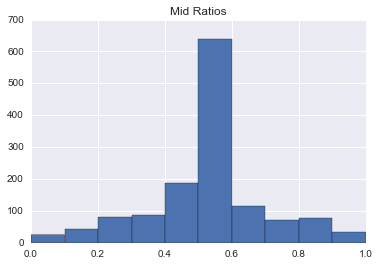

In [93]:
import matplotlib.pyplot as plt
import seaborn

%matplotlib inline

rst_colony.hist(column='Mid Ratios')